In [1]:
import numpy as np
from math import factorial as fact
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('seaborn-dark')
plt.rc('font', size=15)


import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [4]:
def Interpolation(x, u, a):
    N = len(x) - 1
    U = np.zeros((N+1,N+1))
    U[:, 0] = u

    for k in range(1, N+1):   
        for n in range(N + 1 - k):
            U[n,k] = k * (U[n,k-1]-U[n+1,k-1]) / (x[n]-x[n+k])
            
    sm = 0.
    for n in range(N+1):
        P = 1.
        for k in range(n):
            P *= (a - x[k])  
            
        sm += U[0,n] / fact(n)*P
        
    return sm


### Простая интерполяция

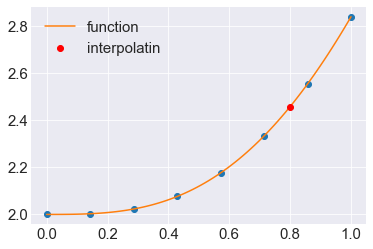

In [12]:
N = 8
a, b = 0, 1
func = lambda x: np.sin(x)*x**2 + 2
x = np.linspace(a, b, N)
u = func(x)
x0 = 0.8


tmp = np.linspace(a, b, N*10)
plt.plot(tmp, func(tmp), label='function')
plt.plot(x, u, 'o')

plt.plot(x0, Interpolation(x, u, x0), 'or', label='interpolation')
plt.legend()
plt.grid(1)

### Интерполяция

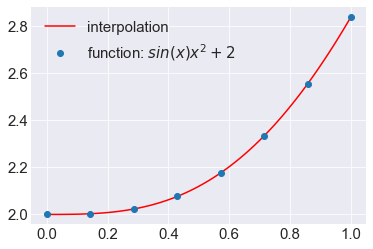

In [19]:
N = 8
a, b = 0, 1
func = lambda x: np.sin(x)*x**2 + 2
x = np.linspace(a, b, N)
u = func(x)


tmp = np.linspace(a, b, N*10)
interp = Interpolation(x, u, tmp)
plt.plot(tmp, interp, color='r',label='interpolation')
plt.plot(x, u, 'o', label='function: $sin(x)x^2+2$')
plt.legend()
plt.grid(1)

### Параметризация интерполяции для изменения порядка обработки точек 

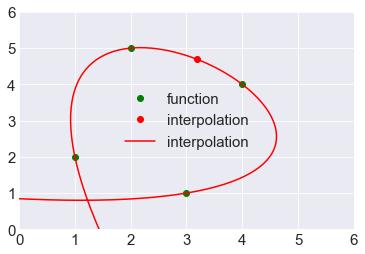

In [17]:
x = np.array([1, 2, 3, 4])
u = np.array([2, 5, 1 ,4])
t = np.array([10, 18, 36, 25])
x0 = 22

plt.plot(x, u, 'og', label='function')
plt.xlim([0, 6])
plt.ylim([0, 6])
plt.plot(Interpolation(t, x, x0), Interpolation(t, u, x0), 'or', label='interpolation')

t_temp = np.linspace(0, 50, 300)
x_temp = Interpolation(t, x, t_temp)
y_temp = Interpolation(t, u, t_temp)

plt.plot(x_temp, y_temp, '-r', label='interpolation')
plt.legend()
plt.grid(1)